In [1]:
import pandas as pd
import os

from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2


from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
abs_2021 = pd.read_csv('../data/curated/2021ABS_csv')

In [3]:
features = [
    'Estimated resident population (no.)',
    'Population density (persons/km2)',
    'Median age - persons (years)',
    'Working age population (aged 15-64 years) (no.)', 'Renter (no.)',
    'Health care and social assistance (no.)','Financial and insurance services (no.)',
    'Administrative and support services (no.)','Education and training (no.)',
    'Accommodation and food services (no.)','Public administration and safety (no.)',
    'Value of residential building ($m)', 'Houses - total (no.)', 
    'Townhouses - total (no.)', 'Apartments - total (no.)', 'Rented (no.)',
    'Count of homeless persons (no.)','Used at least one form of public transport (train, tram, bus, ferry) (no.)',
    'Median weekly household rental payment ($)'
]



In [4]:
abs_features = abs_2021[features]
abs_features = abs_features.dropna(axis=0).reset_index(drop=True)
rent = abs_features['Median weekly household rental payment ($)']
abs_features = abs_features.drop(['Median weekly household rental payment ($)'], axis=1)

In [5]:
test = SelectKBest(score_func=f_classif, k=7)
fit = test.fit(abs_features, rent)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

new_features = fit.transform(abs_features)

new_features.shape


mask = fit.get_support() #list of booleans
best_features = [] # The list of your K best features

for bool_val, feature in zip(mask, features):
    if bool_val:
        best_features.append(feature)

best_features

[1.343 0.971 1.87  1.36  1.827 1.925 0.531 0.775 0.857 1.069 0.919 1.144
 1.316 1.22  1.31  1.236 3.842 0.719]


['Estimated resident population (no.)',
 'Median age - persons (years)',
 'Working age population (aged 15-64 years) (no.)',
 'Renter (no.)',
 'Health care and social assistance (no.)',
 'Houses - total (no.)',
 'Count of homeless persons (no.)']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(new_features, rent, test_size = 0.2, random_state=20037)

lr = LinearRegression().fit(X_train, y_train)

print(lr.score(X_test, y_test))


0.6836123708524136


In [7]:
for i in range(len(best_features)):
    print(best_features[i], '=', lr.coef_[i], '\n')


Estimated resident population (no.) = -0.0035355652837729176 

Median age - persons (years) = 4.074327861137053 

Working age population (aged 15-64 years) (no.) = 0.007581767929359133 

Renter (no.) = -0.34585968840099585 

Health care and social assistance (no.) = 0.17697023477671767 

Houses - total (no.) = -0.004487006424844791 

Count of homeless persons (no.) = -0.20383825407617467 



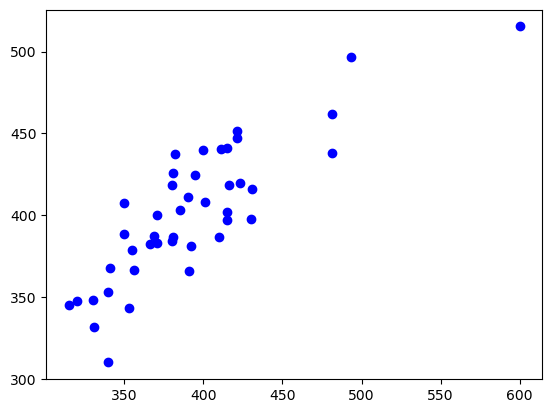

In [8]:
y_pred = lr.predict(X_test)
plt.scatter(y_test, y_pred, color ='b')


In [9]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 23.973710382313335
MSE: 846.7172917986717
RMSE: 29.098407031978084
